Features examples
   alcohol  malic_acid
0    14.23        1.71
1    13.20        1.78
2    13.16        2.36
3    14.37        1.95
4    13.24        2.59


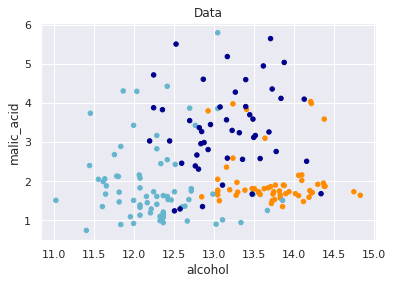

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine

data = load_wine()

X = data.data[:, :2]
y = data.target
m = len(y)
x_names = data.feature_names[:2]
y_names = data.target_names

X_df = pd.DataFrame(X, columns = x_names)

print("Features examples")
print(X_df.head())

cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
plt.title("Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

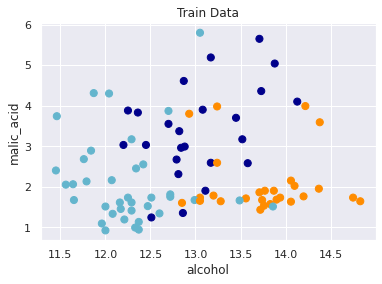

In [19]:
from sklearn.model_selection import train_test_split

#Split into train, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.29, random_state=42)

m_train = len(y_train)
m_val = len(y_val)
m_test = len(y_test)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, s=50)
plt.title("Train Data")
plt.xlabel(x_names[0])
plt.ylabel(x_names[1])
plt.show()

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Model training and evaluation for each C with gamma fixed
# C low -> considered more the margins
# C high -> considered more the outliers -> best with small m

C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
models = []
scores = []

for i in range(len(C_values)):
  models.append(make_pipeline(StandardScaler(), SVC(C=C_values[i])))
  models[i].fit(X_train, y_train)
  scores.append(models[i].score(X_val, y_val))
  print("C: {}   \t gamma: {} \t score: {}".format(C_values[i], models[i]["svc"].gamma, scores[i]))

C: 0.001   	 gamma: scale 	 score: 0.3611111111111111
C: 0.01   	 gamma: scale 	 score: 0.3611111111111111
C: 0.1   	 gamma: scale 	 score: 0.8611111111111112
C: 1.0   	 gamma: scale 	 score: 0.8611111111111112
C: 10.0   	 gamma: scale 	 score: 0.8611111111111112
C: 100.0   	 gamma: scale 	 score: 0.8611111111111112
C: 1000.0   	 gamma: scale 	 score: 0.8333333333333334


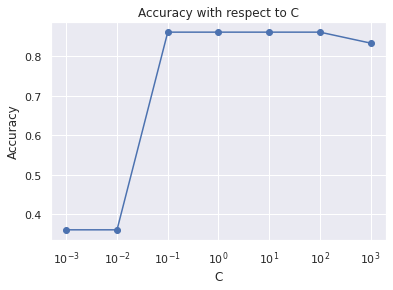

In [21]:
# Results inspections - C
# UPGRADE(and comparison with linear kernel)
plt.figure()
plt.plot(C_values, scores, marker="o")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy with respect to C")
#plt.legend(["linear", "rbf"])
plt.show()

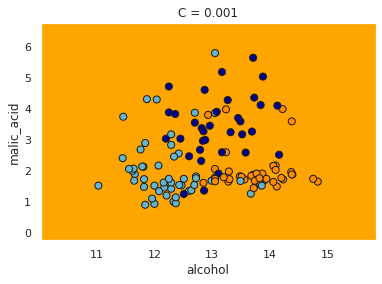

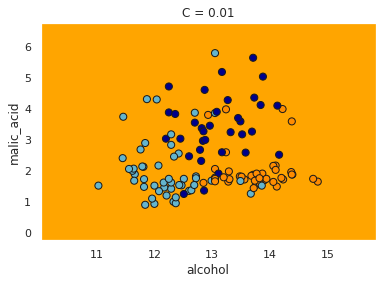

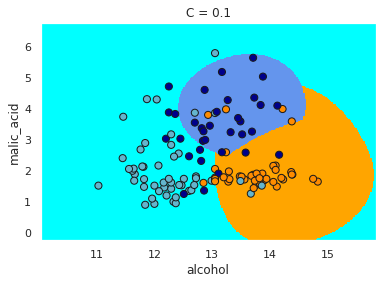

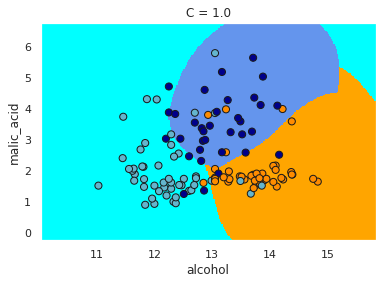

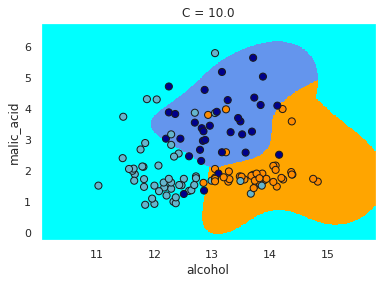

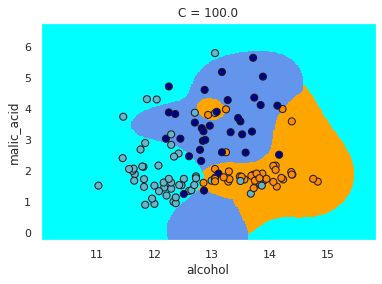

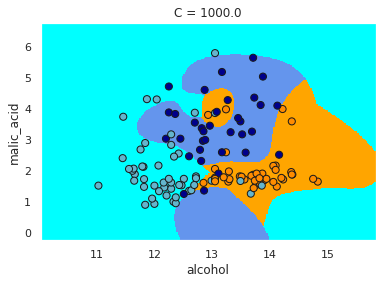

In [22]:
# Results inspections - SVC

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i in range(len(C_values)):
  Z = models[i].predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(X_train_val[:, 0], X_train_val[:, 1], c=y_train_val, cmap=cmap_bold, edgecolor='k', s=50)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(x_names[0])
  plt.ylabel(x_names[1])
  plt.title("C = {}".format(C_values[i]))
plt.show()

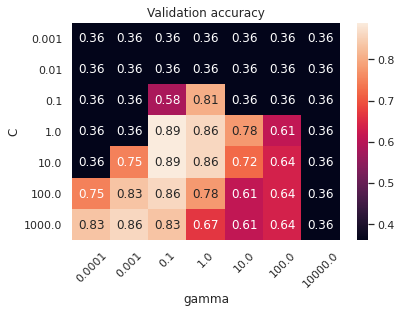

Best parameters:
C: 1.0	- gamma: 0.1
C: 10.0	- gamma: 0.1


In [23]:
#Model training and evaluation with grid search of gamma and C
# gamma low -> points considered similar only if really close
# gamma high -> points easily considered similar

gamma_values = [0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 10000.0]
models = [[] for i in range(len(C_values))]
scores = [[] for i in range(len(C_values))]

for i in range(len(C_values)):
  for j in range(len(gamma_values)):
    models[i].append(make_pipeline(StandardScaler(), SVC(C=C_values[i], gamma=gamma_values[j])))
    models[i][j].fit(X_train, y_train)
    scores[i].append(models[i][j].score(X_val, y_val))

sns.heatmap(scores, annot=True, xticklabels=gamma_values, yticklabels=C_values)
plt.xlabel('gamma')
plt.ylabel('C')
plt.title('Validation accuracy')
plt.xticks(rotation=45)
plt.show()

max_score = max([max(l) for l in scores])
max_score_list = []
for i in range(len(C_values)):
    for j in range(len(gamma_values)):
      if scores[i][j]==max_score:
        max_score_list.append((i,j))
print("Best parameters:")
for t in max_score_list:
  print("C: {}\t- gamma: {}".format(C_values[t[0]], gamma_values[t[1]]))

In [24]:
# Model Evaluation with best (C, gamma)

best_svm = []
acc = []

print("Best models evaluation: ")
for i in range(len(max_score_list)):
  best_svm.append(make_pipeline(StandardScaler(), SVC(C=C_values[max_score_list[i][0]], gamma=gamma_values[max_score_list[i][1]])))
  best_svm[i].fit(X_train_val, y_train_val)
  acc.append(best_svm[i].score(X_test, y_test))
  print("C: {}\t- gamma: {}\t- accuracy: {:.2f}%".format(C_values[max_score_list[i][0]], gamma_values[max_score_list[i][1]], acc[i]*100))

Best models evaluation: 
C: 1.0	- gamma: 0.1	- accuracy: 0.80%
C: 10.0	- gamma: 0.1	- accuracy: 0.81%


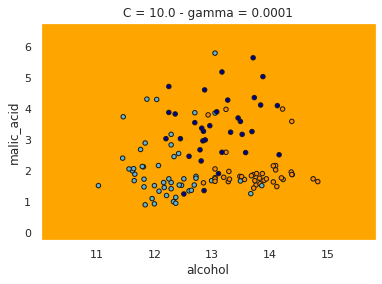

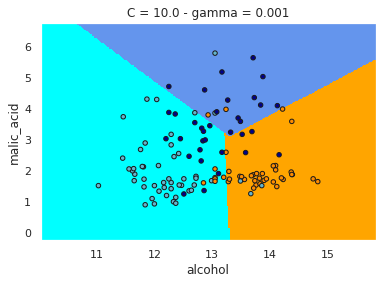

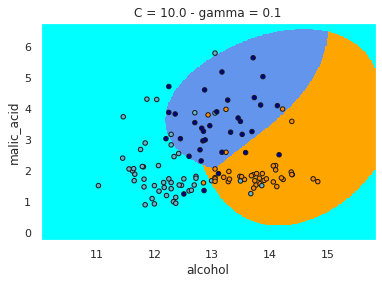

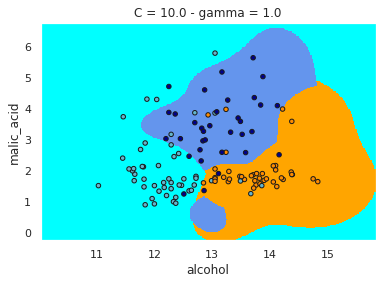

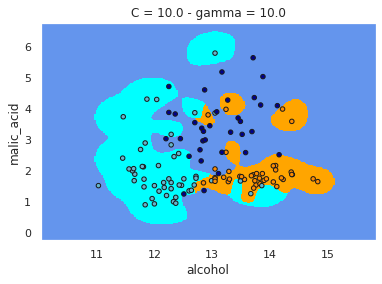

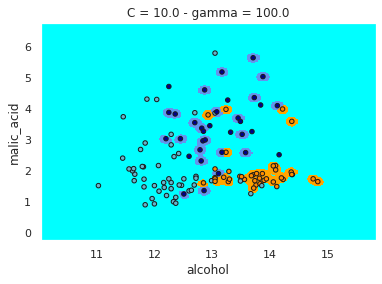

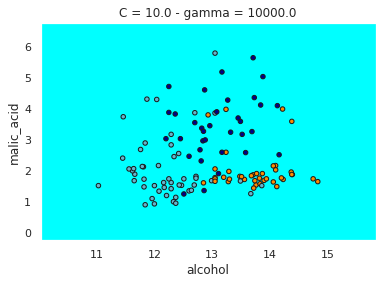

In [25]:
# Results inspections - gamma
# Cases with C = 10

i = 4

for j in range(len(gamma_values)):
  Z = models[i][j].predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(X_train_val[:, 0], X_train_val[:, 1], c=y_train_val, cmap=cmap_bold, edgecolor='k', s=20)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel(x_names[0])
  plt.ylabel(x_names[1])
  plt.title("C = {} - gamma = {}".format(C_values[i], gamma_values[j]))
plt.show()

#gamma determines how closer ponts have to be for being considered similar